In [1]:
# 1. Brute-Force Method
def max_subarray_brute_force(arr):
    max_sum = float('-inf')
    n = len(arr)
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            if current_sum > max_sum:
                max_sum = current_sum
    return max_sum

In [2]:
# 2. Divide-and-Conquer (Recursive)
def max_crossing_subarray(arr, low, mid, high):
    left_sum = float('-inf')
    sum_ = 0
    for i in range(mid, low - 1, -1):
        sum_ += arr[i]
        if sum_ > left_sum:
            left_sum = sum_

    right_sum = float('-inf')
    sum_ = 0
    for i in range(mid+1, high + 1):
        sum_ += arr[i]
        if sum_ > right_sum:
            right_sum = sum_

    return left_sum + right_sum

def max_subarray_divide_and_conquer_helper(arr, low, high):
    if low == high: 
        return arr[low]

    mid = (low + high) // 2

    left_sum = max_subarray_divide_and_conquer_helper(arr, low, mid)
    right_sum = max_subarray_divide_and_conquer_helper(arr, mid+1, high)
    cross_sum = max_crossing_subarray(arr, low, mid, high)

    return max(left_sum, right_sum, cross_sum)

def max_subarray_divide_and_conquer(arr):
    return max_subarray_divide_and_conquer_helper(arr, 0, len(arr) - 1)

In [4]:
import time
import random
import matplotlib.pyplot as plt

In [13]:
def time_function(func, arr):
    start = time.perf_counter()
    result = func(arr)
    end = time.perf_counter()
    return (end - start), result
random.seed(0)

sizes = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

bf_times = []
dc_times = []
hybrid_times = []

for n in sizes:
    arr = [random.randint(-100, 100) for _ in range(n)]

    t_bf, res_bf = time_function(max_subarray_brute_force, arr)

    t_dc, res_dc = time_function(max_subarray_divide_and_conquer, arr)

    bf_times.append(t_bf)
    dc_times.append(t_dc)

    print(f"n = {n:5d} | "
            f"Brute-Force: {t_bf:.6f}s (res={res_bf}), "
            f"D&C: {t_dc:.6f}s (res={res_dc}), ")

n =    10 | Brute-Force: 0.000011s (res=157), D&C: 0.000022s (res=157), 
n =    20 | Brute-Force: 0.000041s (res=209), D&C: 0.000247s (res=209), 
n =    40 | Brute-Force: 0.000083s (res=476), D&C: 0.000147s (res=476), 
n =    80 | Brute-Force: 0.000483s (res=639), D&C: 0.000142s (res=639), 
n =   160 | Brute-Force: 0.000918s (res=1011), D&C: 0.000261s (res=1011), 
n =   320 | Brute-Force: 0.004281s (res=672), D&C: 0.000993s (res=672), 
n =   640 | Brute-Force: 0.025740s (res=1092), D&C: 0.001620s (res=1092), 
n =  1280 | Brute-Force: 0.078919s (res=2408), D&C: 0.002187s (res=2408), 
n =  2560 | Brute-Force: 0.239641s (res=5497), D&C: 0.004474s (res=5497), 
n =  5120 | Brute-Force: 1.048091s (res=3416), D&C: 0.010376s (res=3416), 
n = 10240 | Brute-Force: 4.973463s (res=8226), D&C: 0.018099s (res=8226), 


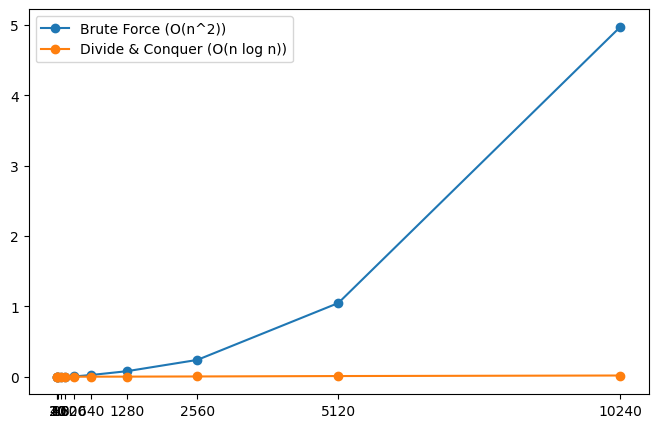

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(sizes, bf_times, marker='o', label='Brute Force (O(n^2))')
plt.plot(sizes, dc_times, marker='o', label='Divide & Conquer (O(n log n))')
plt.xticks(sizes)
plt.legend(loc = "upper left")
plt.show()
# I opened it from the .py file and observed that n0 = 40

### Zoomed Version of the above graph
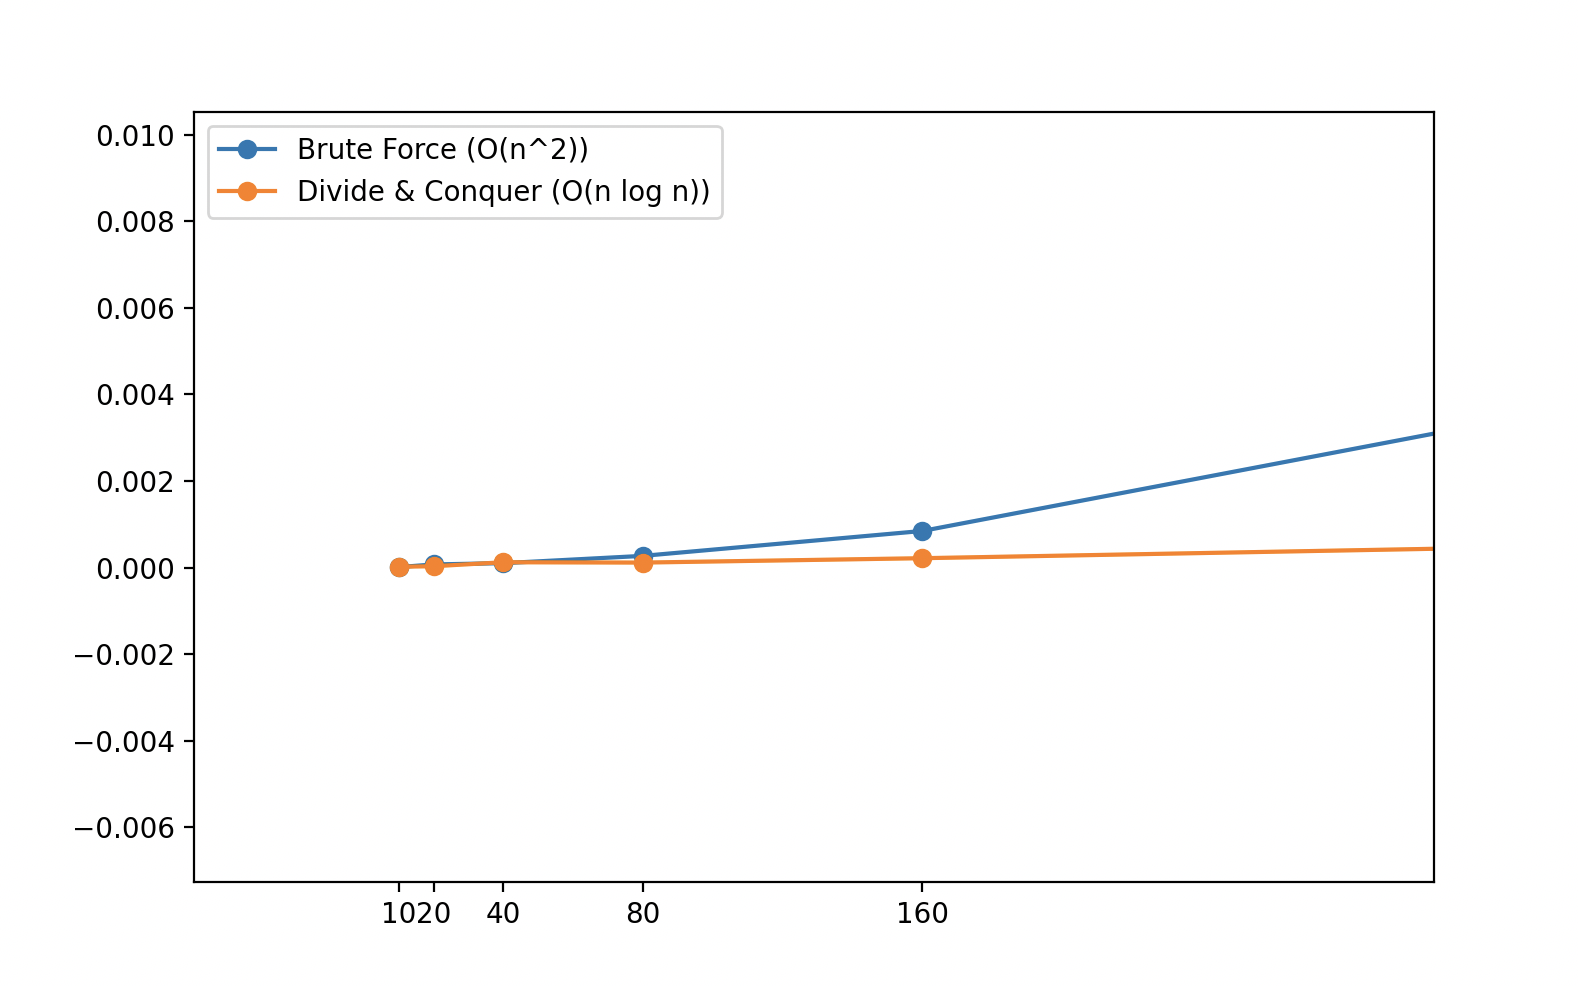

In [19]:
# The n0 we found was 40

n0 = 40
# 3. Hybrid Approach: Divide-and-Conquer with Brute-Force Base
def max_subarray_hybrid_helper(arr, low, high):
    if (high - low + 1) <= n0:
        return max_subarray_brute_force(arr[low:high+1])

    mid = (low + high) // 2
    left_sum = max_subarray_hybrid_helper(arr, low, mid)
    right_sum = max_subarray_hybrid_helper(arr, mid+1, high)
    cross_sum = max_crossing_subarray(arr, low, mid, high)

    return max(left_sum, right_sum, cross_sum)

def max_subarray_hybrid(arr):
    return max_subarray_hybrid_helper(arr, 0, len(arr) - 1)


In [20]:
hybrid_times = []
for n in sizes:
    arr = [random.randint(-100, 100) for _ in range(n)]
    t_hybrid, res_h = time_function(lambda x: max_subarray_hybrid(x), arr)
    hybrid_times.append(t_hybrid)
    print(f"n = {n:5d} | Hybrid: {t_hybrid:.6f}s (res={res_h})")

n =    10 | Hybrid: 0.000013s (res=292)
n =    20 | Hybrid: 0.000024s (res=69)
n =    40 | Hybrid: 0.000056s (res=304)
n =    80 | Hybrid: 0.000120s (res=493)
n =   160 | Hybrid: 0.000246s (res=855)
n =   320 | Hybrid: 0.000533s (res=847)
n =   640 | Hybrid: 0.001168s (res=2238)
n =  1280 | Hybrid: 0.002645s (res=974)
n =  2560 | Hybrid: 0.005170s (res=4730)
n =  5120 | Hybrid: 0.013466s (res=11704)
n = 10240 | Hybrid: 0.024128s (res=4973)


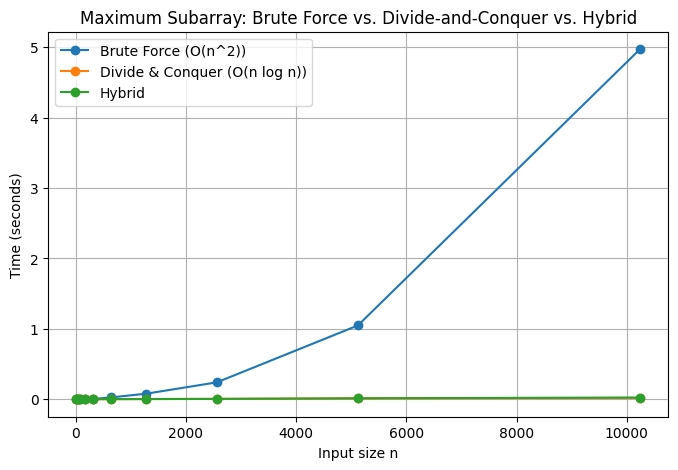

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(sizes, bf_times, marker='o', label='Brute Force (O(n^2))')
plt.plot(sizes, dc_times, marker='o', label='Divide & Conquer (O(n log n))')
plt.plot(sizes, hybrid_times, marker='o', label='Hybrid')
plt.legend(loc = "upper left")
plt.xlabel('Input size n')
plt.ylabel('Time (seconds)')
plt.title('Maximum Subarray: Brute Force vs. Divide-and-Conquer vs. Hybrid')
plt.grid(True)
plt.show()